In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from sklearn import neighbors, metrics, cross_validation, grid_search, linear_model
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1)
%matplotlib inline

In [2]:
# URL to dataset
dataUrl = 'https://raw.githubusercontent.com/kug3lblitz/Heat-Replay/master/src/data/final/final.csv'

# Load the dataset
df = pd.read_csv(dataUrl)

In [3]:
# Check head
df.head(10)

,year,decade,unique_words,density,unique_words_raw,density_raw,nouns,verbs,adjectives,syllables,most_used_term,most_used_freq,curses,total_curses,reading_score,sentiment,charted
0,1961,1960,36,72,65,158,34,30,10,70,rose,7,0,0,2.367848,0.9885,0
1,1961,1960,45,91,74,197,45,37,19,81,name,6,0,0,2.771777,0.9712,1
2,1961,1960,54,103,88,223,45,48,17,98,babi,10,0,0,3.885650,0.9971,1
3,1961,1960,42,148,66,263,81,61,36,76,love,24,0,0,2.889886,0.9993,1
4,1961,1960,28,131,60,354,56,77,5,57,come,38,0,0,2.940000,0.9812,1
5,1961,1960,50,105,79,181,39,40,24,80,mari,13,0,0,3.135470,0.9789,1
6,1961,1960,39,75,70,160,28,35,21,81,take,13,0,0,3.503750,0.9978,1
7,1961,1960,50,94,78,190,62,17,8,83,never,6,0,0,3.074737,-0.9081,1
8,1961,1960,53,63,92,166,25,41,18,105,one,4,0,0,4.993855,0.2533,1
9,1961,1960,48,57,79,124,29,24,7,83,river,5,0,0,4.648387,-0.3400,1


In [4]:
# Basic descriptions of the distribution of the data
df.describe()

,year,decade,unique_words,density,unique_words_raw,density_raw,nouns,verbs,adjectives,syllables,most_used_freq,curses,total_curses,reading_score,sentiment,charted
count,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000,3904.000000
mean,1991.199795,1986.552254,61.288166,137.016137,93.791496,292.182889,65.571209,64.231301,21.847336,105.648822,15.445184,0.175461,1.178023,4.874880,0.457047,0.580943
std,13.556839,13.559383,35.331564,80.208321,45.511645,168.326983,44.005934,42.659356,17.708684,56.066287,13.698001,0.380410,4.894722,3.527072,0.744473,0.493468
min,1961.000000,1960.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,-3.427959,-0.999700,0.000000
25%,1981.000000,1980.000000,40.000000,84.000000,67.000000,181.000000,36.000000,34.000000,11.000000,72.000000,7.000000,0.000000,0.000000,2.975612,0.000000,0.000000
50%,1994.000000,1990.000000,53.000000,118.000000,85.000000,256.000000,54.000000,57.000000,17.000000,93.000000,12.000000,0.000000,0.000000,4.161161,0.927400,1.000000
75%,2003.000000,2000.000000,70.000000,165.000000,108.000000,355.000000,81.000000,84.000000,28.000000,121.000000,19.000000,0.000000,0.000000,5.747534,0.988400,1.000000
max,2010.000000,2010.000000,307.000000,638.000000,388.000000,1415.000000,376.000000,346.000000,205.000000,481.000000,234.000000,1.000000,88.000000,84.237399,0.999900,1.000000


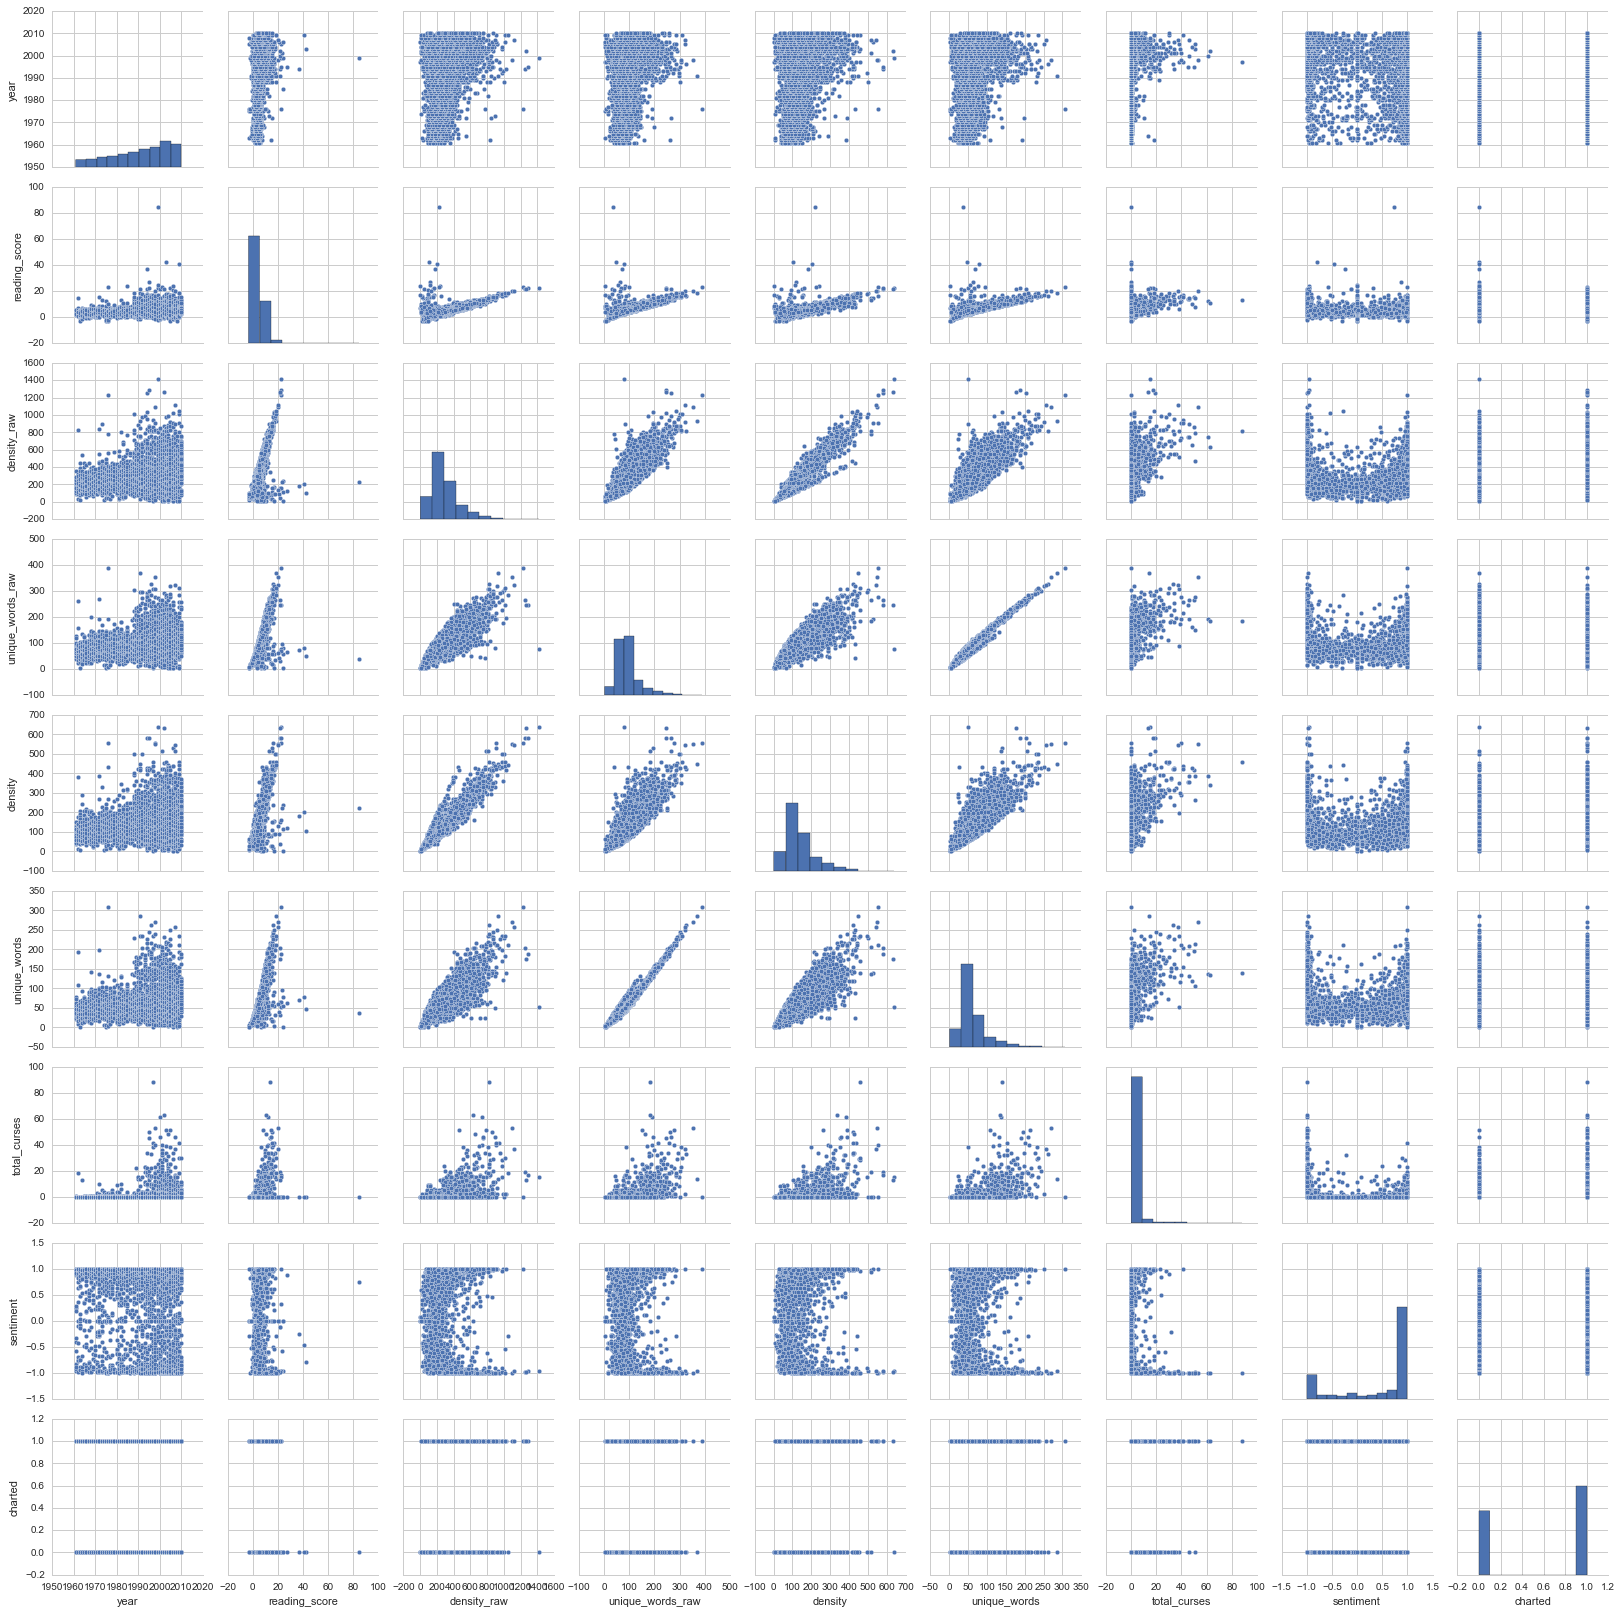

In [14]:

# Get pair plot for major features of the dataset
sns.pairplot(
    df[
        ['year',
         'reading_score', 
         'density_raw', 
         'unique_words_raw', 
         'density',
         'unique_words',
         'total_curses', 
         'sentiment', 
         'charted']
    ]
)

In [5]:
df.drop(['most_used_term'], axis=1, inplace=True)

# Set features to use
features = list(df)
features.remove('charted')
features.remove('year')
features.remove('decade')

In [6]:
# Set target variable name
target = 'charted'

# Set X and y
X = df[features]
y = df[target]

In [7]:
# Create separate training and test sets with 60/40 train/test split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.4, random_state=42
)

# Random forests

In [8]:
from sklearn import ensemble, tree

# Instantiate model using default params
tm = tree.DecisionTreeClassifier()

# Train model on training set
tm.fit(X_train, y_train)

# Evaluate accuracy of model on test set
print "Accuracy: %0.3f" % tm.score(X_test, y_test)

# Evaluate ROC AUC score of model on test set
print 'ROC AUC: %0.3f' % metrics.roc_auc_score(y_test, tm.predict_proba(X_test)[:,1])

Accuracy: 0.633
ROC AUC: 0.627


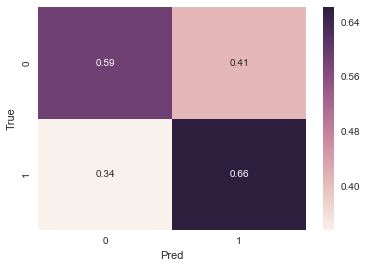

Confusion Matrix:
[[389 270]
 [304 599]]


In [9]:
# Get confusion matrix on test set
y_pred = tm.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax = plt.axes()
sns.heatmap(cm_normalized, annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Pred')
plt.show()

print "Confusion Matrix:"
print cm

In [10]:
# Evaluate model on train set
print "Accuracy: %0.3f" % tm.score(X_train, y_train)

# Evaluate model on test set
print "Accuracy: %0.3f" % tm.score(X_test, y_test)

Accuracy: 1.000
Accuracy: 0.633


In [11]:
# Instantiate model
rf = ensemble.RandomForestClassifier(n_estimators=20)

# Train model on training set
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Best Params:
{'n_estimators': 512}
Accuracy of current model: 0.704
Accuracy using best param: 0.713
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy of current model: 0.704
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=512, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy of updated model: 0.723


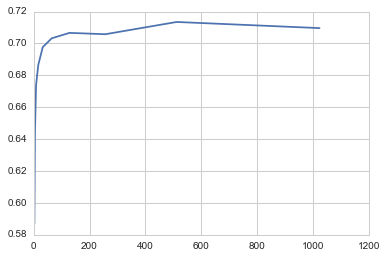

In [12]:
# Set list of values to grid search over
n = [np.power(2, i+1) for i in range(10)]
params = {'n_estimators': n}

# Perform grid search using list of values
gs = grid_search.GridSearchCV(
    estimator=ensemble.RandomForestClassifier(),
    param_grid=params)
gs.fit(X_train, y_train)

# Get best value to use
print "Best Params:"
print gs.best_params_

# Get improvement
print "Accuracy of current model: %0.3f" % rf.score(X_test, y_test)
print "Accuracy using best param: %0.3f" % gs.best_score_

# Plot scores
plt.plot(n, [s[1] for s in gs.grid_scores_])



# Current model params
print rf
print "Accuracy of current model: %0.3f" % rf.score(X_test, y_test)

# Update model params
rf.set_params(n_estimators=gs.best_params_['n_estimators'])

# Retrain model on new params
rf.fit(X_train, y_train)

# Updated model params
print rf
print "Accuracy of updated model: %0.3f" % rf.score(X_test, y_test)

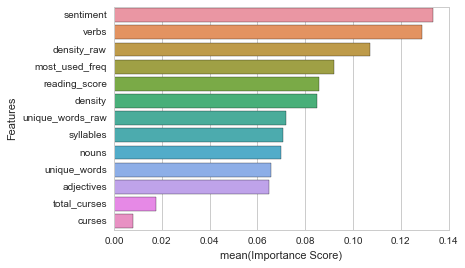

In [13]:
# Plot importances for all features
features = X.columns
feature_importances = rf.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

sns.barplot(y='Features', x='Importance Score', data=features_df)

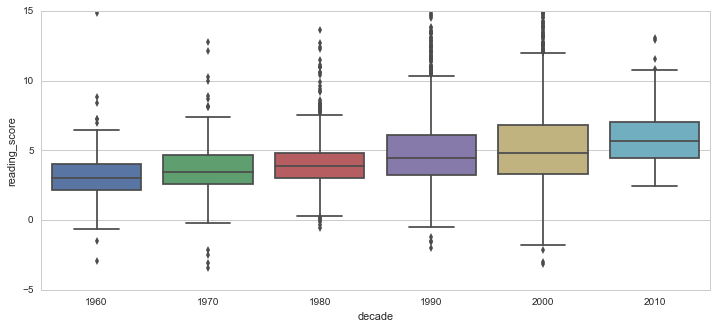

In [16]:
# Drop the invalid outliers

df_copy = df[df['reading_score']>-3.4]
df_copy = df[df['reading_score']<=15.0]

fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(df_copy['decade'], df_copy['reading_score'], ax=ax)

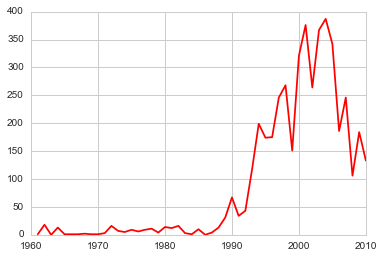

In [17]:
# Quick time series of the unnormalized reading score data points

year = set(df['year'])

# Plot the mean of the reading scores
x, y = zip(
    *sorted(
        (
            xVal, np.sum(
                [
                    yVal for av, yVal in zip(
                        df['year'], df['total_curses']
                    ) if xVal==av
                ]
            )
        ) for xVal in year
    )
)

plt.plot(x, y, 'r-')

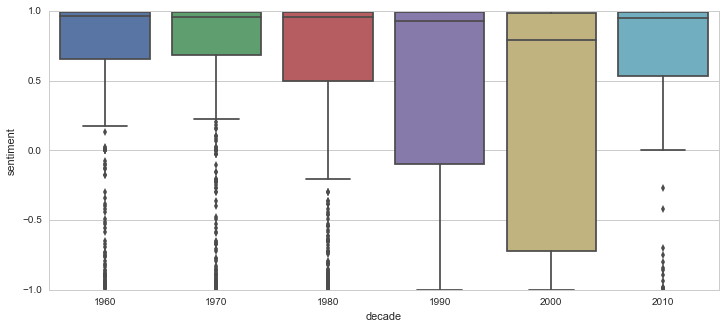

In [20]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(df['decade'], df['sentiment'], ax=ax)